In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


%matplotlib inline

In [12]:
train = pd.read_csv('data/train.csv')  
test = pd.read_csv('data/test.csv')

#state_train = pd.get_dummies(train.user_state, prefix='state')
#train = pd.concat([train, state_train], axis=1)
train.drop(['user_state'], axis=1, inplace=True)

#state_test = pd.get_dummies(test.user_state, prefix='state')
#test = pd.concat([test, state_test], axis=1)
test.drop(['user_state'], axis=1, inplace=True)




train.head()

,click,screen_resolution,video,score,reviews,editors_choice,price,iap,installs,bids
0,0,921600,1,4.3,155129,False,0.0,True,10000000,10460
1,0,921600,1,4.3,155129,False,0.0,True,10000000,10460
2,0,4096000,1,4.3,155129,False,0.0,True,10000000,10460
3,0,921600,1,4.3,155129,False,0.0,True,10000000,10460
4,0,4096000,1,4.3,155129,False,0.0,True,10000000,10460


In [13]:
X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']


feature_list = list(X_train.columns)
print(f'feature_list: {feature_list}')


feature_list: ['screen_resolution', 'video', 'score', 'reviews', 'editors_choice', 'price', 'iap', 'installs', 'bids']


In [15]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train, y_train);

# Use the forest's predict method on the test data
y_pred = rfr.predict(X_test)

# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.13


Variable: screen_resolution    Importance: 0.31
Variable: bids                 Importance: 0.28
Variable: reviews              Importance: 0.21
Variable: score                Importance: 0.12
Variable: installs             Importance: 0.04
Variable: video                Importance: 0.01
Variable: iap                  Importance: 0.01
Variable: editors_choice       Importance: 0.0
Variable: price                Importance: 0.0


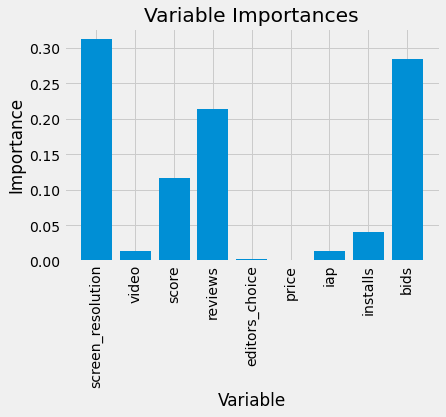

In [16]:
# Get numerical feature importances
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(train, round(importance, 2)) for train, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');